In [7]:
#载入必要的包

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



from keras.utils import np_utils, plot_model
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split




In [8]:
# 设置matplotlib绘图时的字体
from matplotlib import font_manager

my_font=font_manager.FontProperties(fname="/Library/Fonts/Songti.ttc")


In [9]:
# In[ ]: 读入数据
data=pd.read_csv("data.csv")
#查看数据
print(data.head())

                                          evaluation label
0                                    用了一段时间，感觉还不错，可以    正面
1  电视非常好，已经是家里的第二台了。第一天下单，第二天就到本地了，可是物流的人说车坏了，一直催...    正面
2                  电视比想象中的大好多，画面也很清晰，系统很智能，更多功能还在摸索中    正面
3                                                 不错    正面
4     用了这么多天了，感觉还不错。夏普的牌子还是比较可靠。希望以后比较耐用，现在是考量质量的时候。    正面


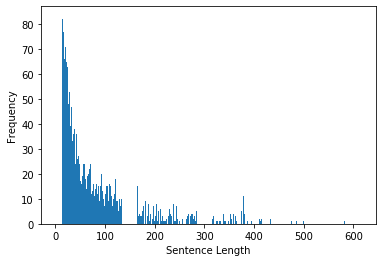

In [10]:
# 统计句子长度及长度出现的频数

data["length"]=data["evaluation"].apply(lambda x:len(x))
len_data=data.groupby("length").count()
length=len_data.index.tolist()
freq=len_data["evaluation"].tolist()
plt.bar(length,freq)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()



In [11]:
labels, vocabulary = list(data["label"].unique()),list(data["evaluation"].unique())

In [12]:
# 标签及词汇表
labels, vocabulary = list(data["label"].unique()),list(data["evaluation"].unique())
# 构造字符级别的特征

string=""
for word in vocabulary:
    string+=word
    
vocabulary=set(string)

print(vocabulary)




{'困', '哩', '雅', '某', '史', '逊', '极', 'R', '侯', '欣', '逐', '惠', '拔', '蕉', '增', '液', '适', '才', '关', '尤', '嗯', '维', '舒', 'v', '抓', '充', '脏', '瓜', '灵', '臭', '挽', '豔', '存', '帐', '坑', '荣', '秉', '饰', '武', '琅', '虎', '拜', '仇', '卵', '瓷', '示', '提', '胜', '啊', '借', '帘', '晨', '购', '诶', '佛', '劵', '奢', '悔', 'g', '`', '1', '研', '对', '…', '虹', '扒', '讲', '乔', '機', 'Z', '潮', '剔', '晚', '托', '。', '酒', 'H', '报', '年', '怕', '锤', '历', '副', '窗', '劣', '盯', '途', '项', '高', '球', '刚', '^', '培', '惟', '闷', '明', '噱', '录', '协', '｀', '照', 'V', '隙', '捞', '配', '号', '量', '论', '阔', '给', '含', '掌', '迂', '沙', '調', '樂', '软', '琴', '《', '少', '概', '錯', '玩', '或', '斯', '赠', '處', 'k', '定', '耻', '章', '志', '遗', 'm', '予', '屋', '桌', '蹭', '哎', '审', '职', '随', '央', '栏', '滴', '衍', '喳', '勿', '练', '晒', '草', '再', '割', '暂', '牠', '荒', '惜', '阴', '葱', '笔', '返', '暗', '早', '咨', '谓', '闲', '烁', '爹', '蛋', '分', '咱', '佰', '似', '鯨', '间', '戚', '樣', '误', '忠', '接', '净', '旺', '弄', '帅', '算', '鱼', '喇', '缘', '数', '搁', '营', '确', '疼', '竞', '旨', '晌', '想', '樱', '废', '缆',

In [7]:
print(len(vocabulary))

2154


In [13]:
# 制作字典列表，用在人机交互
word_dictionary={word:i+1 for i ,word in enumerate(vocabulary)}


inverse_word_dictionary={i+1:word for i ,word in enumerate(vocabulary)}

print(inverse_word_dictionary)



{1: '困', 2: '哩', 3: '雅', 4: '某', 5: '史', 6: '逊', 7: '极', 8: 'R', 9: '侯', 10: '欣', 11: '逐', 12: '惠', 13: '拔', 14: '蕉', 15: '增', 16: '液', 17: '适', 18: '才', 19: '关', 20: '尤', 21: '嗯', 22: '维', 23: '舒', 24: 'v', 25: '抓', 26: '充', 27: '脏', 28: '瓜', 29: '灵', 30: '臭', 31: '挽', 32: '豔', 33: '存', 34: '帐', 35: '坑', 36: '荣', 37: '秉', 38: '饰', 39: '武', 40: '琅', 41: '虎', 42: '拜', 43: '仇', 44: '卵', 45: '瓷', 46: '示', 47: '提', 48: '胜', 49: '啊', 50: '借', 51: '帘', 52: '晨', 53: '购', 54: '诶', 55: '佛', 56: '劵', 57: '奢', 58: '悔', 59: 'g', 60: '`', 61: '1', 62: '研', 63: '对', 64: '…', 65: '虹', 66: '扒', 67: '讲', 68: '乔', 69: '機', 70: 'Z', 71: '潮', 72: '剔', 73: '晚', 74: '托', 75: '。', 76: '酒', 77: 'H', 78: '报', 79: '年', 80: '怕', 81: '锤', 82: '历', 83: '副', 84: '窗', 85: '劣', 86: '盯', 87: '途', 88: '项', 89: '高', 90: '球', 91: '刚', 92: '^', 93: '培', 94: '惟', 95: '闷', 96: '明', 97: '噱', 98: '录', 99: '协', 100: '｀', 101: '照', 102: 'V', 103: '隙', 104: '捞', 105: '配', 106: '号', 107: '量', 108: '论', 109: '阔', 110: '给', 111: '含

In [14]:
# 查看词汇表大小和标签类别数量
label_dictionary={label:i for i, label in enumerate(labels)}

output_dictionary={i:label for i, label in enumerate(labels)}

print(label_dictionary)
print(output_dictionary)


{'正面': 0, '负面': 1}
{0: '正面', 1: '负面'}


In [15]:
vocab_size=len(word_dictionary.keys())
label_size=len(label_dictionary.keys())
print(vocab_size)
print(label_size)


2154
2


In [16]:
#制作训练输入和训练标签
#对于训练输入要进行序列填充，按input_shape填充，长度不足的按0补充

x=[[word_dictionary[word] for word in sent] for sent in data["evaluation"]]

x=pad_sequences(maxlen=180, truncating="pre", sequences=x,padding="post",value=0)

print(x.shape)






(4283, 180)


In [16]:
print(x)

[[ 498 1235 1455 ...    0    0    0]
 [ 752 1014 1292 ...    0    0    0]
 [ 752 1014 1266 ...    0    0    0]
 ...
 [1455 1517  513 ...    0    0    0]
 [2001  752 1014 ...    0    0    0]
 [1455  671  671 ...    0    0    0]]


In [17]:
#对于训练目标进行ONE-HOT-CODING

y=[[label_dictionary[sent]]for sent in data["label"]]
y=[np_utils.to_categorical(label,num_classes=label_size) for label in y]
y=np.array([list(_[0]) for _ in y])

print(y.shape)






(4283, 2)


In [18]:
# 拆分训练集和测试集

train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.1)






In [19]:
#搭建模型
model=Sequential()
model.add(Embedding(input_dim=vocab_size+1,output_dim=20,input_length=180,mask_zero=True))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(label_size,activation="softmax"))
model.summary()
    



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 180, 20)           43100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               48400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 91,702
Trainable params: 91,702
Non-trainable params: 0
_________________________________________________________________


In [20]:
#编译模型

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
#训练模型
model.fit(train_x,train_y,epochs=5,batch_size=32,validation_data=(test_x,test_y))


Instructions for updating:
Use tf.cast instead.
Train on 3854 samples, validate on 429 samples
Epoch 1/5
3854/3854 [==============================] - 30s 8ms/step - loss: 0.4905 - acc: 0.7883 - val_loss: 0.3278 - val_acc: 0.9207
Epoch 2/5
3854/3854 [==============================] - 28s 7ms/step - loss: 0.2333 - acc: 0.9222 - val_loss: 0.2370 - val_acc: 0.9301
Epoch 3/5
3854/3854 [==============================] - 27s 7ms/step - loss: 0.1799 - acc: 0.9419 - val_loss: 0.2260 - val_acc: 0.9277
Epoch 4/5
3854/3854 [==============================] - 27s 7ms/step - loss: 0.1507 - acc: 0.9538 - val_loss: 0.1913 - val_acc: 0.9347
Epoch 5/5
3854/3854 [==============================] - 29s 7ms/step - loss: 0.1305 - acc: 0.9608 - val_loss: 0.2005 - val_acc: 0.9464


In [24]:
#测试新的评论
sent="真好"

temp_x=[[word_dictionary[word] for word in sent]]
temp_x=pad_sequences(maxlen=180,sequences=temp_x,padding="post",value=0)

print(temp_x)
# 模型预测

y_predict=model.predict(temp_x)
print(output_dictionary[np.argmax(y_predict)])




[[268 287   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
负面
